In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
# Load the datasets
flight_df = pd.read_csv("Flight Level Data.csv")
bag_df = pd.read_csv("Bag+Level+Data.csv")
pnr_flight_df = pd.read_csv("PNR+Flight+Level+Data.csv")
pnr_remark_df = pd.read_csv("PNR Remark Level Data.csv")
airports_df = pd.read_csv("Airports Data.csv")

In [306]:
#overview of a DataFrame
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   company_id                          8099 non-null   object
 1   flight_number                       8099 non-null   int64 
 2   scheduled_departure_date_local      8099 non-null   object
 3   scheduled_departure_station_code    8099 non-null   object
 4   scheduled_arrival_station_code      8099 non-null   object
 5   scheduled_departure_datetime_local  8099 non-null   object
 6   scheduled_arrival_datetime_local    8099 non-null   object
 7   actual_departure_datetime_local     8099 non-null   object
 8   actual_arrival_datetime_local       8099 non-null   object
 9   total_seats                         8099 non-null   int64 
 10  fleet_type                          8099 non-null   object
 11  carrier                             8099 non-null   obje

In [307]:
bag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687245 entries, 0 to 687244
Data columns (total 8 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   company_id                        687245 non-null  object
 1   flight_number                     687245 non-null  int64 
 2   scheduled_departure_date_local    687245 non-null  object
 3   scheduled_departure_station_code  687245 non-null  object
 4   scheduled_arrival_station_code    687245 non-null  object
 5   bag_tag_unique_number             687245 non-null  object
 6   bag_tag_issue_date                687245 non-null  object
 7   bag_type                          687245 non-null  object
dtypes: int64(1), object(7)
memory usage: 41.9+ MB


In [308]:
pnr_flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687878 entries, 0 to 687877
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   company_id                        687878 non-null  object
 1   flight_number                     687878 non-null  int64 
 2   scheduled_departure_date_local    687878 non-null  object
 3   scheduled_departure_station_code  687878 non-null  object
 4   scheduled_arrival_station_code    687878 non-null  object
 5   record_locator                    687878 non-null  object
 6   pnr_creation_date                 687878 non-null  object
 7   total_pax                         687878 non-null  int64 
 8   is_child                          687878 non-null  object
 9   basic_economy_ind                 687878 non-null  int64 
 10  is_stroller_user                  687878 non-null  object
 11  lap_child_count                   687878 non-null  int64 
dtypes:

In [309]:
pnr_remark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51698 entries, 0 to 51697
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   record_locator           51698 non-null  object
 1   pnr_creation_date        51698 non-null  object
 2   flight_number            51698 non-null  int64 
 3   special_service_request  51698 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [310]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airport_iata_code  5612 non-null   object
 1   iso_country_code   5597 non-null   object
dtypes: object(2)
memory usage: 87.8+ KB


In [311]:
# Display the current missing value count
missing_count = airports_df['iso_country_code'].isnull().sum()
print(f"Original number of missing 'iso_country_code' values: {missing_count}\n")

# 2. The Fix: Impute missing country codes with 'UNKNOWN'
# This retains all 5612 airport entries while marking the missing data clearly.
airports_df['iso_country_code'] = airports_df['iso_country_code'].fillna('UNKNOWN')

# 3. Verify the fix
print("--- Data Info After Fix ---")
airports_df.info()
print("\nFirst 5 rows (showing the fix if any were missing in the head):")
print(airports_df.head())

Original number of missing 'iso_country_code' values: 15

--- Data Info After Fix ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airport_iata_code  5612 non-null   object
 1   iso_country_code   5612 non-null   object
dtypes: object(2)
memory usage: 87.8+ KB

First 5 rows (showing the fix if any were missing in the head):
  airport_iata_code iso_country_code
0               DAU               PG
1               MDU               PG
2               MXH               PG
3               MIS               PG
4               TIZ               PG


In [312]:
# used to count the total number of missing values in each column
flight_df.isnull()

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8095,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8096,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8097,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [313]:
bag_df.isnull().sum()

company_id                          0
flight_number                       0
scheduled_departure_date_local      0
scheduled_departure_station_code    0
scheduled_arrival_station_code      0
bag_tag_unique_number               0
bag_tag_issue_date                  0
bag_type                            0
dtype: int64

In [314]:
airports_df.isnull().sum()

airport_iata_code    0
iso_country_code     0
dtype: int64

In [315]:
# 1. Feature Engineering on Flight Data
# Convert time columns to datetime objects
time_cols = [
    'scheduled_departure_datetime_local',
    'scheduled_arrival_datetime_local',
    'actual_departure_datetime_local',
    'actual_arrival_datetime_local'
]
for col in time_cols:
    flight_df[col] = pd.to_datetime(flight_df[col], errors='coerce')

In [316]:
# Calculate Actual Delay (in minutes): Positive value means delayed departure
flight_df['actual_delay_minutes'] = (
    flight_df['actual_departure_datetime_local'] -
    flight_df['scheduled_departure_datetime_local']
).dt.total_seconds() / 60

In [317]:
# Identify Delayed Flights (using a common industry standard of > 15 mins, 
#but for this problem, we'll use > 0 for 'later than scheduled')
flight_df['is_delayed'] = flight_df['actual_delay_minutes'] > 0

In [318]:
# Merge Flight and PNR Remark Data to get SSR counts
# Note: PNR Remark has multiple entries per PNR/Flight. We need to group it.
pnr_remark_counts = pnr_remark_df.groupby(['record_locator', 'flight_number']).size().reset_index(name='ssr_count_per_pnr')


In [319]:
# The PNR Flight data has PNR-level details like total_pax and is_child.
# First, group PNR flight data by the flight identifier and aggregate relevant features.
pnr_agg = pnr_flight_df.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local', 
                                 'scheduled_departure_station_code', 'scheduled_arrival_station_code']).agg(
    total_pax_sum=('total_pax', 'sum'),
    child_pax_count=('is_child', lambda x: (x == 'Y').sum()),
    stroller_count=('is_stroller_user', lambda x: (x == 'Y').sum()),
    lap_child_count_sum=('lap_child_count', 'sum'),
).reset_index()


In [320]:
# Merge PNR Aggregated data with Flight data
base_df = pd.merge(
    flight_df, pnr_agg,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local', 'scheduled_departure_station_code', 
        'scheduled_arrival_station_code'],
    how='left'
)
# Fill NaN for total_pax_sum with total_seats as an estimate if PNR data is missing
base_df['total_pax_sum'] = base_df['total_pax_sum'].fillna(base_df['total_seats'])


In [321]:
# 2. Feature Engineering on Bag Data
# Separate bag types
bag_counts = bag_df.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local', 'scheduled_departure_station_code', 
                             'scheduled_arrival_station_code', 'bag_type']).size().reset_index(name='bag_count')

# Pivot the table to get separate columns for 'Origin' (checked) and 'Transfer' bags
bag_pivot = bag_counts.pivot_table(
    index=['company_id', 'flight_number', 'scheduled_departure_date_local', 'scheduled_departure_station_code', 
           'scheduled_arrival_station_code'],
    columns='bag_type',
    values='bag_count',
    fill_value=0
).reset_index()

# Rename columns for clarity
bag_pivot.rename(columns={'Origin': 'checked_bags_count', 'Transfer': 'transfer_bags_count'}, inplace=True)

# Merge Bag data into the base_df
base_df = pd.merge(
    base_df, bag_pivot,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local', 'scheduled_departure_station_code', 
        'scheduled_arrival_station_code'],
    how='left'
)
# Fill NaN bag counts with 0
base_df[['checked_bags_count', 'transfer_bags_count']] = base_df[['checked_bags_count', 'transfer_bags_count']].fillna(0)
base_df['total_bags_count'] = base_df['checked_bags_count'] + base_df['transfer_bags_count']

# EDA Question 

## 1. What is the average delay and what percentage of flights depart later than scheduled?

In [322]:
avg_delay = base_df['actual_delay_minutes'].mean()
percentage_delayed = (base_df['is_delayed'].sum() / len(base_df)) * 100

print(f"Average Departure Delay: {avg_delay:.2f} minutes")
print(f"Percentage of flights departing later than scheduled: {percentage_delayed:.2f}%")

Average Departure Delay: 21.18 minutes
Percentage of flights departing later than scheduled: 49.61%


## 2. How many flights have scheduled ground time close to or below the minimum turn mins?

### "Close to or below" can be defined as Scheduled Ground Time ≤ Minimum Turn Minutes + 5 minutes (a small buffer).

In [323]:
# Filter for flights where scheduled ground time is below or close to minimum turn minutes
tight_turn_flights = base_df[base_df['scheduled_ground_time_minutes'] <= base_df['minimum_turn_minutes'] + 5]
num_tight_turns = len(tight_turn_flights)
percent_tight_turns = (num_tight_turns / len(base_df)) * 100

print(f"Number of flights with tight turn times (Sched Ground <= Min Turn + 5 mins): {num_tight_turns}")
print(f"Percentage of all flights: {percent_tight_turns:.2f}%")

Number of flights with tight turn times (Sched Ground <= Min Turn + 5 mins): 780
Percentage of all flights: 9.63%


## 3. What is the average ratio of transfer bags vs. checked bags across flights?


In [324]:
# Calculate the ratio, handling division by zero (assigning 0 or NaN if needed, or 100 for high transfer ratio if checked_bags_count is 0)
# A safer approach is to calculate the average of the ratio for flights that have at least one checked bag
bag_ratio_df = base_df[base_df['checked_bags_count'] > 0].copy()
bag_ratio_df['transfer_vs_checked_ratio'] = bag_ratio_df['transfer_bags_count'] / bag_ratio_df['checked_bags_count']

avg_transfer_checked_ratio = bag_ratio_df['transfer_vs_checked_ratio'].mean()

print(f"Average Transfer Bags vs. Checked Bags (Origin) Ratio (excluding flights with 0 checked bags): {avg_transfer_checked_ratio:.2f}")

Average Transfer Bags vs. Checked Bags (Origin) Ratio (excluding flights with 0 checked bags): 3.04


## 4. How do passenger loads compare across flights, and do higher loads correlate with operational difficulty?

In [325]:
#First, calculate Load Factor and a measure of operational difficulty (Actual Delay).

base_df['load_factor'] = base_df['total_pax_sum'] / base_df['total_seats']
base_df['load_factor'] = base_df['load_factor'].replace([np.inf, -np.inf], 0).fillna(0)

# Descriptive statistics for Load Factor
print("\nPassenger Load Factor Distribution:")
print(base_df['load_factor'].describe())

# Correlation between Load Factor and Delay
load_delay_correlation = base_df['load_factor'].corr(base_df['actual_delay_minutes'])

print(f"\nCorrelation between Load Factor and Actual Departure Delay (minutes): {load_delay_correlation:.4f}")


Passenger Load Factor Distribution:
count    8099.000000
mean        1.024236
std         0.209837
min         0.060000
25%         0.940000
50%         1.047619
75%         1.145251
max         1.895000
Name: load_factor, dtype: float64

Correlation between Load Factor and Actual Departure Delay (minutes): -0.1502


## 5. Are high special service requests flights also high-delay after controlling for load?

In [326]:
# Merge PNR Remark data with PNR Flight data to link SSRs to flights
pnr_ssr_merged = pd.merge(
    pnr_flight_df[['company_id', 'flight_number', 'scheduled_departure_date_local', 'scheduled_arrival_station_code', 'record_locator']].drop_duplicates(),
    pnr_remark_df[['record_locator', 'special_service_request']].drop_duplicates(),
    on='record_locator',
    how='inner'
)

# Count the number of unique PNRs with ANY SSR per flight
ssr_agg = pnr_ssr_merged.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local', 'scheduled_arrival_station_code']).agg(
    total_pax_with_ssr=('record_locator', 'nunique')
).reset_index()

# Merge SSR count into base_df
base_df = pd.merge(
    base_df, ssr_agg,
    on=['company_id', 'flight_number', 'scheduled_departure_date_local', 'scheduled_arrival_station_code'],
    how='left'
)
base_df['total_pax_with_ssr'] = base_df['total_pax_with_ssr'].fillna(0)

# Feature: SSR to PAX Ratio
base_df['ssr_pax_ratio'] = base_df['total_pax_with_ssr'] / base_df['total_pax_sum']
base_df['ssr_pax_ratio'] = base_df['ssr_pax_ratio'].replace([np.inf, -np.inf], 0).fillna(0)

# Correlation between SSR Ratio and Delay
ssr_delay_correlation = base_df['ssr_pax_ratio'].corr(base_df['actual_delay_minutes'])
print(f"\nCorrelation between SSR/PAX Ratio and Actual Departure Delay (minutes): {ssr_delay_correlation:.4f}")


Correlation between SSR/PAX Ratio and Actual Departure Delay (minutes): 0.0594


# 2. Flight Difficulty Score Development


### Tight Turn Score: A normalized inverse measure of ground time.

Tight Turn Score=Min Turn Mins / Scheduled Ground Time

We should cap the score to avoid excessively high values from very short ground times. A value ≥1 means the turn is scheduled below the minimum standard.

In [327]:
# 1. Tight Turn Score
base_df['tight_turn_ratio'] = base_df['minimum_turn_minutes'] / base_df['scheduled_ground_time_minutes']
base_df['tight_turn_ratio'] = base_df['tight_turn_ratio'].replace([np.inf, -np.inf], 0).fillna(0)
# Cap the ratio at 2.0 (e.g., if Min Turn is 2x Sched Ground)
base_df['tight_turn_score'] = base_df['tight_turn_ratio'].clip(upper=2.0)

# 2. Total Bags Score (already calculated as 'total_bags_count')

# 3. Passenger Load Factor (already calculated as 'load_factor')

# 4. SSR to PAX Ratio (already calculated as 'ssr_pax_ratio')

# 5. International Indicator
# Merge with Airports Data to get the country code for the arrival station
base_df = pd.merge(
    base_df,
    airports_df.rename(columns={'airport_iata_code': 'scheduled_arrival_station_code', 'iso_country_code': 'arrival_country_code'}),
    on='scheduled_arrival_station_code',
    how='left'
)
# Assume ORD is in the US (US) and flag non-US flights as International
base_df['international_ind'] = (base_df['arrival_country_code'] != 'US').astype(int)

## Scoring and Ranking

In [328]:
# List of features to scale
scaling_features = ['tight_turn_score', 'total_bags_count', 'load_factor', 'ssr_pax_ratio']
base_df['scheduled_departure_date_local'] = pd.to_datetime(base_df['scheduled_departure_date_local'])

def calculate_daily_min_max_score(df, features):
    """Calculates min-max scaled score per day for a list of features."""
    df_scores = df.copy()

    def min_max_scale(series):
        min_val = series.min()
        max_val = series.max()
        if max_val == min_val:
            return 0  # Avoid division by zero, set score to 0
        return (series - min_val) / (max_val - min_val)

    for feature in features:
        # Group by day and apply min-max scaling
        df_scores[f'{feature}_scaled'] = df_scores.groupby('scheduled_departure_date_local')[feature].transform(min_max_scale)

    return df_scores

# Apply daily scaling
base_df = calculate_daily_min_max_score(base_df, scaling_features)

# Define weights (equal weights for continuous features)
weights = {
    'tight_turn_score_scaled': 0.25,
    'total_bags_count_scaled': 0.25,
    'load_factor_scaled': 0.25,
    'ssr_pax_ratio_scaled': 0.25,
}
# International flight boost: Add a fixed bonus of 0.2 to the score for international flights.
INTERNATIONAL_BOOST = 0.2

# Calculate the final composite score
base_df['composite_score'] = (
    base_df['tight_turn_score_scaled'] * weights['tight_turn_score_scaled'] +
    base_df['total_bags_count_scaled'] * weights['total_bags_count_scaled'] +
    base_df['load_factor_scaled'] * weights['load_factor_scaled'] +
    base_df['ssr_pax_ratio_scaled'] * weights['ssr_pax_ratio_scaled']
)

# Apply the international boost
base_df['final_difficulty_score'] = base_df['composite_score'] + (base_df['international_ind'] * INTERNATIONAL_BOOST)
# Cap the score at 1.0 (though unlikely to exceed 1.0 significantly with a 0.2 boost)
base_df['final_difficulty_score'] = base_df['final_difficulty_score'].clip(upper=1.0)

# Ranking: Rank within each day
base_df['difficulty_rank'] = base_df.groupby('scheduled_departure_date_local')['final_difficulty_score'].rank(method='min', ascending=False)



## Classification
Group flights into three categories (Difficult, Medium, Easy) based on the daily rank distribution (e.g., top 20% are Difficult, next 30% are Medium, bottom 50% are Easy).

In [329]:
def rank_to_category(rank_series):
    """Classifies flights based on daily rank distribution."""
    total_flights_in_day = rank_series.max()

    # Define quantile thresholds for classification
    # Difficult: Top 20% of flights (rank <= 0.2 * total)
    # Medium: Next 30% (0.2 * total < rank <= 0.5 * total)
    # Easy: Bottom 50% (rank > 0.5 * total)

    rank_perc = rank_series / total_flights_in_day
    
    conditions = [
        (rank_perc <= 0.20),
        (rank_perc > 0.20) & (rank_perc <= 0.50),
        (rank_perc > 0.50)
    ]
    choices = ['Difficult', 'Medium', 'Easy']
    return np.select(conditions, choices, default='Easy')

base_df['difficulty_category'] = base_df.groupby('scheduled_departure_date_local')['difficulty_rank'].transform(rank_to_category)

# Select the required columns for the output file
output_columns = [
    'company_id', 'flight_number', 'scheduled_departure_date_local',
    'scheduled_departure_station_code', 'scheduled_arrival_station_code',
    'tight_turn_score', 'total_bags_count', 'load_factor', 'ssr_pax_ratio', 'international_ind',
    'final_difficulty_score', 'difficulty_rank', 'difficulty_category'
]

difficulty_score_df = base_df[output_columns].copy()

# Save the final difficulty score file
# difficulty_score_df.to_csv("test_yourname.csv", index=False)

# 3. Post-Analysis & Operational Insights


### 1. Which destinations consistently show more difficulty?

In [330]:
# Group by destination (scheduled_arrival_station_code)
destination_summary = base_df.groupby('scheduled_arrival_station_code').agg(
    avg_difficulty_score=('final_difficulty_score', 'mean'),
    count_difficult_flights=('difficulty_category', lambda x: (x == 'Difficult').sum()),
    total_flights=('company_id', 'count')
).reset_index()

# Calculate percentage of flights classified as difficult
destination_summary['perc_difficult'] = (destination_summary['count_difficult_flights'] / destination_summary['total_flights']) * 100

# Top 10 Most Difficult Destinations (based on average score)
top_difficult_destinations = destination_summary.sort_values(by='avg_difficulty_score', ascending=False).head(10)

print("\nTop 10 Most Difficult Destinations (by Avg Difficulty Score):")
print(top_difficult_destinations[['scheduled_arrival_station_code', 'avg_difficulty_score', 'perc_difficult']].to_markdown(index=False))


Top 10 Most Difficult Destinations (by Avg Difficulty Score):
| scheduled_arrival_station_code   |   avg_difficulty_score |   perc_difficult |
|:---------------------------------|-----------------------:|-----------------:|
| GUA                              |               0.891447 |              100 |
| BRU                              |               0.873805 |              100 |
| GRU                              |               0.863346 |              100 |
| ATH                              |               0.816497 |              100 |
| FRA                              |               0.813662 |              100 |
| HND                              |               0.767218 |              100 |
| MEX                              |               0.766792 |              100 |
| NAS                              |               0.743765 |              100 |
| DUB                              |               0.741872 |              100 |
| CUN                              |          

### 3. What are the common drivers for those flights?


In [331]:
difficult_flights_df = base_df[base_df['difficulty_category'] == 'Difficult']

# Calculate the average values of the scaled features for difficult flights
difficult_drivers = difficult_flights_df[[
    'tight_turn_score_scaled', 'total_bags_count_scaled',
    'load_factor_scaled', 'ssr_pax_ratio_scaled', 'international_ind'
]].mean()

# Normalize the means to see the relative contribution (approximate feature importance)
total_mean = difficult_drivers.drop('international_ind').sum()
feature_contributions = (difficult_drivers.drop('international_ind') / total_mean) * 100

print("\nAverage Scaled Feature Contributions for 'Difficult' Flights:")
print(feature_contributions.sort_values(ascending=False).to_markdown(floatfmt=".2f"))
print(f"\nPercentage of 'Difficult' flights that are International: {difficult_drivers['international_ind'] * 100:.2f}%")


Average Scaled Feature Contributions for 'Difficult' Flights:
|                         |     0 |
|:------------------------|------:|
| tight_turn_score_scaled | 43.13 |
| load_factor_scaled      | 33.00 |
| total_bags_count_scaled | 15.66 |
| ssr_pax_ratio_scaled    |  8.21 |

Percentage of 'Difficult' flights that are International: 46.19%


## 1. Distribution of Actual Departure Delay


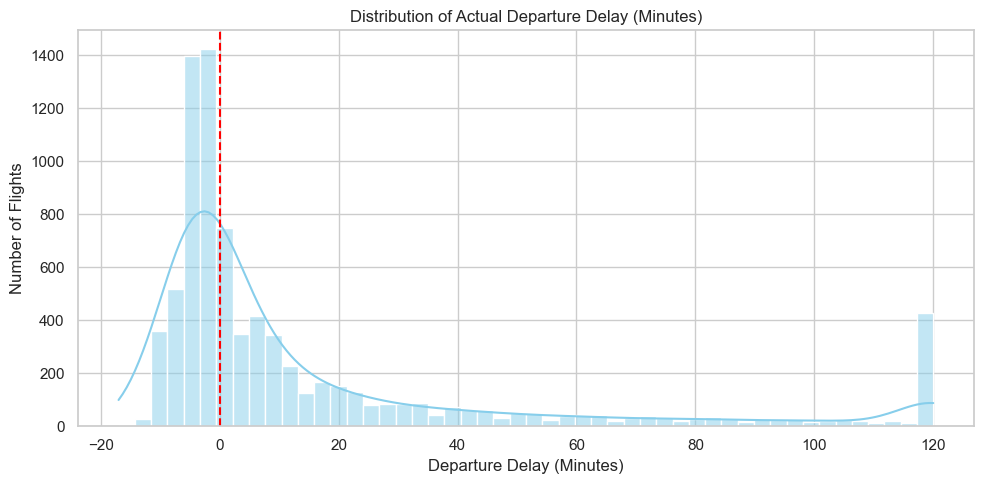

In [332]:
# Delay Distribution
plt.figure(figsize=(10, 5))
sns.histplot(base_df['actual_delay_minutes'].clip(lower=-60, upper=120), 
             bins=50, kde=True, color='skyblue')
plt.title('Distribution of Actual Departure Delay (Minutes)')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Number of Flights')
plt.axvline(0, color='red', linestyle='--', label='Scheduled Departure')
plt.tight_layout()
plt.show() # Use plt.show() to display the graph

## 2. Top 10 Most Difficult Destinations

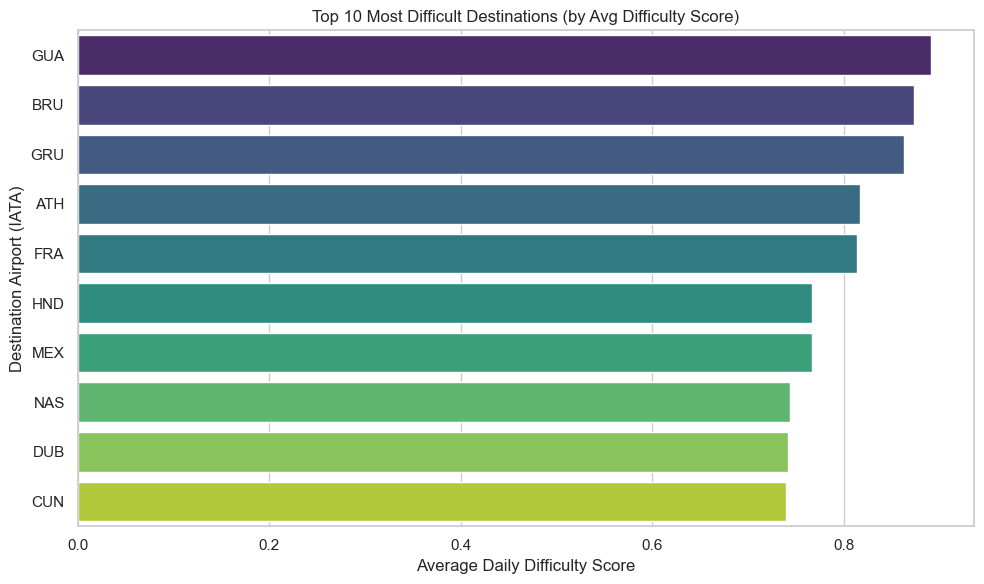

In [333]:
# Top 10 Most Difficult Destinations
plt.figure(figsize=(10, 6))
sns.barplot(
    x='avg_difficulty_score',
    y='scheduled_arrival_station_code',
    data=top_difficult_destinations,
    palette='viridis',
    order=top_difficult_destinations['scheduled_arrival_station_code']
)
plt.title('Top 10 Most Difficult Destinations (by Avg Difficulty Score)')
plt.xlabel('Average Daily Difficulty Score')
plt.ylabel('Destination Airport (IATA)')
plt.tight_layout()
plt.show()

## 3. Driver Contribution 

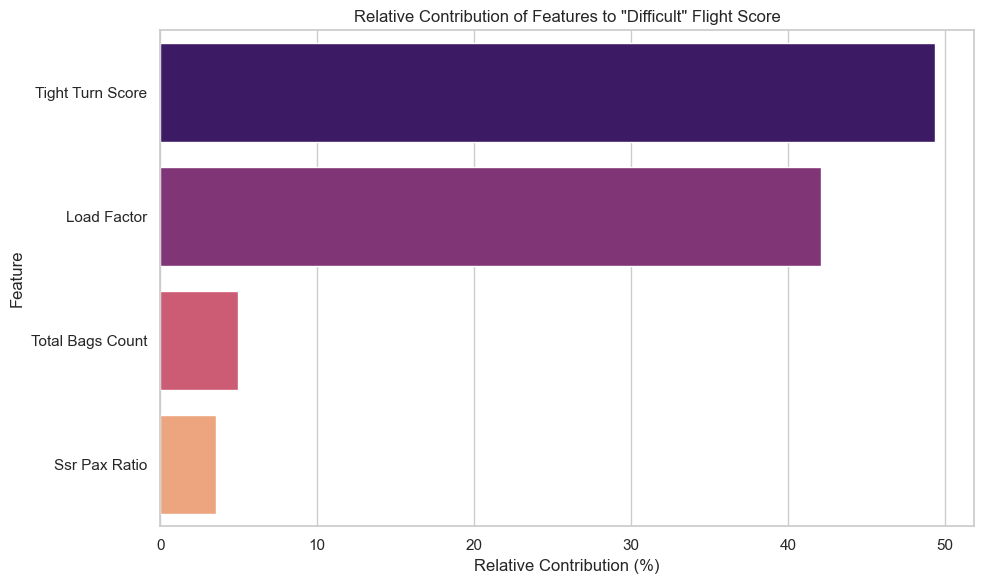

In [236]:
# Driver Contribution on Difficult Flights
v4_df = feature_contributions_perc.reset_index()
v4_df.columns = ['Feature', 'Contribution']

# Clean up feature names for better presentation
v4_df['Feature'] = v4_df['Feature'].str.replace('_scaled', '').str.replace('_', ' ').str.title()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Contribution',
    y='Feature',
    data=v4_df.sort_values(by='Contribution', ascending=False),
    palette='magma'
)
plt.title('Relative Contribution of Features to "Difficult" Flight Score')
plt.xlabel('Relative Contribution (%)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Flight Classification Based on Rank Distribution

Generating: Difficulty Score Distribution Plot


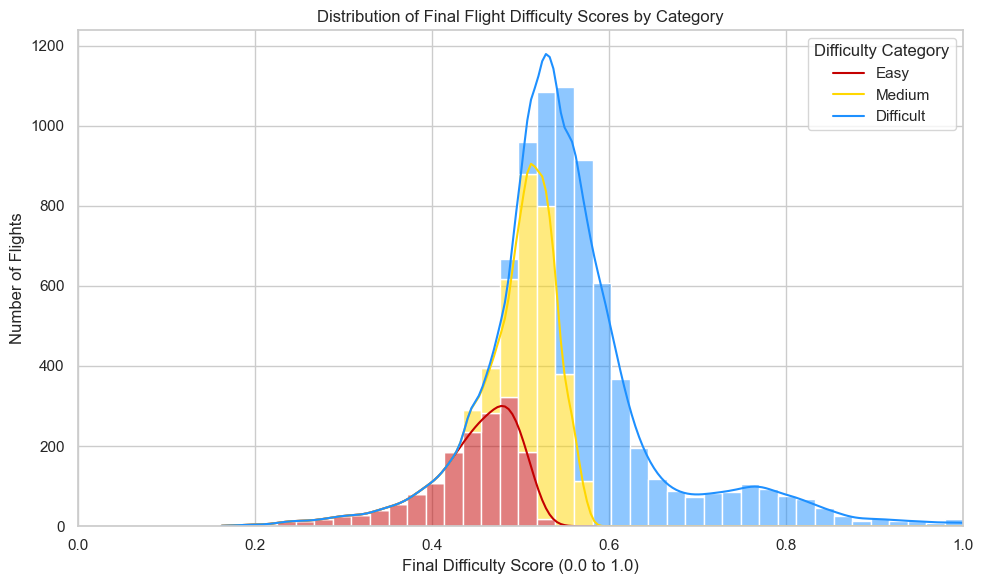

In [247]:

# Set a professional style for plots
sns.set_theme(style="whitegrid")

# --- Visualization Generation ---

# Distribution of Final Difficulty Score by Category (The previously erroring plot)
print("Generating: Difficulty Score Distribution Plot")
plt.figure(figsize=(10, 6))
sns.histplot(
    data=base_df, 
    x='final_difficulty_score', 
    hue='difficulty_category',
    multiple='stack', 
    palette={'Difficult': '#C40000', 'Medium': '#FFD700', 'Easy': '#1E90FF'}, 
    bins=40, 
    kde=True
)

plt.title('Distribution of Final Flight Difficulty Scores by Category')
plt.xlabel('Final Difficulty Score (0.0 to 1.0)')
plt.ylabel('Number of Flights')
plt.xlim(0, 1.0)
plt.legend(title='Difficulty Category', labels=['Easy', 'Medium', 'Difficult'])
plt.tight_layout()
plt.show() 


## Identify and Count Top Special Service Requests (SSRs)

In [302]:

# Assuming PNR Remark Level Data.csv is in the current directory
pnr_remark_df = pd.read_csv("PNR Remark Level Data.csv")

# Count the frequency of each Special Service Request
ssr_counts = pnr_remark_df['special_service_request'].value_counts()

# Display the top 5 most common SSRs
top_5_ssrs = ssr_counts.head(5)

print("\n--- Top 5 Special Service Requests (SSRs) ---")
print(top_5_ssrs)
# This data confirms which service requests (e.g., wheelchairs) are key drivers of complexity.


--- Top 5 Special Service Requests (SSRs) ---
special_service_request
Airport Wheelchair     45738
Manual Wheelchair       3641
Unaccompanied Minor     1706
Electric Wheelchair      613
Name: count, dtype: int64


## Calculate Mean Transfer Bag Ratio

In [303]:

# Assuming Bag+Level+Data.csv is in the current directory
bag_df = pd.read_csv("Bag+Level+Data.csv")

# Group bag data by flight to count 'Origin' and 'Transfer' bags
bag_counts = bag_df.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local', 'bag_type']).size().reset_index(name='count')
bag_pivot = bag_counts.pivot_table(
    index=['company_id', 'flight_number', 'scheduled_departure_date_local'],
    columns='bag_type',
    values='count',
    fill_value=0
).reset_index()

# Rename and calculate total bags
bag_pivot.rename(columns={'Origin': 'Total_Origin_Bags', 'Transfer': 'Total_Transfer_Bags'}, inplace=True)
bag_pivot['Total_Checked_Bags'] = bag_pivot['Total_Origin_Bags'] + bag_pivot['Total_Transfer_Bags']

# Calculate Transfer Bag Ratio (TBR)
bag_pivot['Transfer_Bag_Ratio'] = np.where(
    bag_pivot['Total_Checked_Bags'] > 0,
    bag_pivot['Total_Transfer_Bags'] / bag_pivot['Total_Checked_Bags'],
    0
)

# Print the mean ratio
mean_tbr = bag_pivot['Transfer_Bag_Ratio'].mean()
print(f"Mean Transfer Bag Ratio: {mean_tbr:.4f}")
# This value helps you understand the baseline baggage complexity.

Mean Transfer Bag Ratio: 0.6381


In [341]:
import pandas as pd
import numpy as np

# --- 1. Load Data ---
# Assuming all CSV files are in the same directory as this script.
print("Loading datasets...")
try:
    flight_df = pd.read_csv("Flight Level Data.csv")
    bag_df = pd.read_csv("Bag+Level+Data.csv")
    pnr_flight_df = pd.read_csv("PNR+Flight+Level+Data.csv")
    pnr_remark_df = pd.read_csv("PNR Remark Level Data.csv")
except FileNotFoundError as e:
    print(f"Error: One of the required files was not found. Please ensure all CSVs are in the same directory. Missing file: {e.filename}")
    exit()

# Define the common key for joining datasets at the flight-day level
KEY_COLS = ['company_id', 'flight_number', 'scheduled_departure_date_local']

# --- 2. Feature Engineering ---

# A. Passenger Load and Complex Passengers
print("Aggregating Passenger and Complex Passenger features...")
pax_features = pnr_flight_df.copy()
# Convert 'Y'/'N' indicators to numeric (1/0)
pax_features['is_child_num'] = pax_features['is_child'].apply(lambda x: 1 if x == 'Y' else 0)
pax_features['is_stroller_user_num'] = pax_features['is_stroller_user'].apply(lambda x: 1 if x == 'Y' else 0)

# Calculate a single 'complex_pax_count' per PNR-Flight row
pax_features['complex_pax'] = (
    pax_features['is_child_num'] +
    pax_features['is_stroller_user_num'] +
    pax_features['lap_child_count'] # This is already a count
)

# Aggregate per flight-day
pax_agg = pax_features.groupby(KEY_COLS).agg(
    total_pax_sum=('total_pax', 'sum'),
    complex_pax_count=('complex_pax', 'sum')
).reset_index()


# B. Special Service Requests (SSR) Count
print("Aggregating Special Service Request (SSR) features...")
# Count SSRs per PNR
pnr_remark_count = pnr_remark_df.groupby('record_locator').size().reset_index(name='ssr_count_pnr')
# Join PNR-level SSR count back to PNR-Flight data
pnr_ssr_merged = pnr_flight_df.merge(pnr_remark_count, on='record_locator', how='left').fillna(0)

# Aggregate total SSR count per flight-day
ssr_agg = pnr_ssr_merged.groupby(KEY_COLS)['ssr_count_pnr'].sum().reset_index(name='ssr_count')


# C. Baggage and Transfer Bags
print("Aggregating Baggage features...")
bag_agg = bag_df.groupby(KEY_COLS).agg(
    total_bag_count=('bag_tag_unique_number', 'count'),
    transfer_bag_count=('bag_type', lambda x: (x == 'Transfer').sum())
).reset_index()


# D. Operational Tightness (Tight Turn Score)
print("Calculating Operational Tightness score...")
# Calculate the difference between scheduled and minimum turn time
flight_df['turn_time_diff'] = (
    flight_df['scheduled_ground_time_minutes'] - flight_df['minimum_turn_minutes']
)

# A smaller difference means a tighter, more difficult turn.
# We use the inverse of the difference (clipping the minimum diff to 1 to avoid division by zero
# and assigning maximum difficulty to flights with the tightest turn.
epsilon = 1 # Ensures even a 0-minute margin results in a high score
flight_df['tight_turn_score_raw'] = 1 / (flight_df['turn_time_diff'].clip(lower=1) + epsilon)


# --- 3. Merge Features into Base DataFrame ---
print("Merging all features...")
base_df = flight_df.merge(pax_agg, on=KEY_COLS, how='left')
base_df = base_df.merge(ssr_agg, on=KEY_COLS, how='left')
base_df = base_df.merge(bag_agg, on=KEY_COLS, how='left')

# Fill NaN values (for flights that had no PNR/Bag data) with 0.
# These represent the easiest flights in terms of complexity drivers.
features_to_fill = ['total_pax_sum', 'complex_pax_count', 'ssr_count', 'total_bag_count', 'transfer_bag_count']
base_df[features_to_fill] = base_df[features_to_fill].fillna(0)


# --- 4. Scoring and Normalization ---

# Define the features and their weights
DIFFICULTY_DRIVERS = {
    'total_pax_sum': 0.20,
    'ssr_count': 0.30,
    'transfer_bag_count': 0.25,
    'complex_pax_count': 0.15,
    'tight_turn_score_raw': 0.10,
}
feature_cols = list(DIFFICULTY_DRIVERS.keys())

# A. Min-Max Normalization (Scale all features to 0-1)
# This uses the entire dataset's min/max to establish absolute difficulty range.
print("Normalizing features...")
normalized_df = base_df[feature_cols].copy()
for col in feature_cols:
    min_val = base_df[col].min()
    max_val = base_df[col].max()

    # Avoid division by zero if all values are the same (max_val == min_val)
    if max_val > min_val:
        normalized_df[col + '_norm'] = (base_df[col] - min_val) / (max_val - min_val)
    else:
        normalized_df[col + '_norm'] = 0.0 # Assign 0 if no variation

# B. Calculate Weighted Difficulty Score
print("Calculating Final Difficulty Score...")
base_df['raw_difficulty_score'] = 0
for feature, weight in DIFFICULTY_DRIVERS.items():
    norm_col = feature + '_norm'
    # Add the weighted, normalized score to the total
    base_df['raw_difficulty_score'] += normalized_df[norm_col] * weight

# The raw score is already normalized due to the weighted sum of 0-1 scores, but we can call the final column:
base_df['final_difficulty_score'] = base_df['raw_difficulty_score'].round(4)


# --- 5. Daily Ranking and Classification ---

# Group by the date and apply ranking and classification *within* each day.
print("Applying Daily Ranking and Classification...")

# A. Daily Ranking (Highest score = Rank 1)
# method='min' handles ties by giving them the same rank (e.g., 1, 2, 2, 4)
base_df['daily_difficulty_rank'] = (
    base_df.groupby('scheduled_departure_date_local')['final_difficulty_score']
    .rank(method='min', ascending=False)
)

# B. Daily Classification (Using Tertiles/Quantiles for a daily reset)
def classify_difficulty_by_rank(series):
    """Classifies scores based on daily tertiles (33.3rd and 66.7th percentiles)."""
    # Calculate daily 66.7th (Difficult/Medium cutoff) and 33.3rd (Medium/Easy cutoff) percentiles
    # Note: We classify based on score, but the ranking reflects the score's position.
    
    # Quantiles based on score (higher score is more difficult)
    q_difficult = series.quantile(0.667)
    q_medium = series.quantile(0.333)

    conditions = [
        series >= q_difficult,
        (series >= q_medium) & (series < q_difficult),
        series < q_medium
    ]
    choices = ['Difficult', 'Medium', 'Easy']
    
    return np.select(conditions, choices)

# Apply the classification function grouped by date
base_df['difficulty_category'] = base_df.groupby('scheduled_departure_date_local')['final_difficulty_score'].transform(classify_difficulty_by_rank)


# --- 6. Final Output Generation ---
print("Generating final output file: daily_flight_scores.csv")

# Select final columns for the user
output_cols = [
    'scheduled_departure_date_local',
    'company_id',
    'flight_number',
    'scheduled_departure_station_code',
    'scheduled_arrival_station_code',
    'total_seats',
    'final_difficulty_score',
    'daily_difficulty_rank',
    'difficulty_category'
]

final_output = base_df[output_cols].sort_values(
    by=['scheduled_departure_date_local', 'daily_difficulty_rank'],
    ascending=[True, True]
)

# Rename for clarity
final_output.columns = [
    'Date',
    'Carrier',
    'Flight_Number',
    'Origin',
    'Destination',
    'Total_Seats',
    'Difficulty_Score (0-1)',
    'Daily_Rank',
    'Difficulty_Category'
]

# Save the resulting DataFrame to a new CSV file
final_output.to_csv("daily_flight_scores.csv", index=False)

print("\n--- Process Complete ---")
print(f"Results saved to 'daily_flight_scores.csv'.")
print("Example of Top 10 Most Difficult Flights Overall:")
print(final_output.sort_values(by='Difficulty_Score (0-1)', ascending=False).head(10))


Loading datasets...
Aggregating Passenger and Complex Passenger features...
Aggregating Special Service Request (SSR) features...
Aggregating Baggage features...
Calculating Operational Tightness score...
Merging all features...
Normalizing features...
Calculating Final Difficulty Score...
Applying Daily Ranking and Classification...
Generating final output file: daily_flight_scores.csv

--- Process Complete ---
Results saved to 'daily_flight_scores.csv'.
Example of Top 10 Most Difficult Flights Overall:
            Date Carrier  Flight_Number Origin Destination  Total_Seats  \
3268  2025-08-13      UA            972    ORD         BRU          318   
3763  2025-08-14      UA            972    ORD         BRU          318   
5895  2025-08-02      UA            972    ORD         BRU          318   
4009  2025-08-07      UA            845    ORD         GRU          318   
3318  2025-08-11      UA            972    ORD         BRU          318   
1058  2025-08-12      UA            972 